## Estimate the gravity equation using trade flows data

In [89]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import math
import matplotlib.pyplot as plt

In [91]:
# import trade data into a pandas dataframe (i=exporter, j=importer)
trade_data_df = pd.read_excel(open("Gravity Model Data.xlsx"))

# create columns for the logs of real gdp and the distance columns
trade_data_df["log_value_ij"] = trade_data_df['value_ij'].apply(lambda x: math.log(x))
trade_data_df["log_distance_ij"] = trade_data_df['distance_ij'].apply(lambda x: math.log(x))
trade_data_df["log_rgdp_i"] = trade_data_df['rgdp_i'].apply(lambda x: math.log(x))
trade_data_df["log_rgdp_j"] = trade_data_df['rgdp_j'].apply(lambda x: math.log(x))

trade_data_df.head()

,iso_i,iso_j,value_ij,contig_ij,language_ij,colony_ij,distance_ij,rgdp_i,rgdp_j,log_value_ij,log_distance_ij,log_rgdp_i,log_rgdp_j
0,AUS,AUS,1.349485e+06,1,1,1,1121.103649,730586.25,7.305862e+05,14.115233,7.022069,13.501603,13.501603
1,AUS,AUT,3.804523e+02,0,0,0,15608.418243,730586.25,2.774703e+05,5.941361,9.655566,13.501603,12.533469
2,AUS,BEL,1.327064e+03,0,0,0,16319.186512,730586.25,3.105108e+05,7.190724,9.700097,13.501603,12.645974
3,AUS,BGR,5.946881e+01,0,0,0,14823.570471,730586.25,8.078810e+04,4.085452,9.603974,13.501603,11.299585
4,AUS,BRA,1.030812e+03,0,0,0,14046.748413,730586.25,1.434127e+06,6.938102,9.550146,13.501603,14.176067


In [92]:
# summary statistics
trade_data_df.describe()

,value_ij,contig_ij,language_ij,colony_ij,distance_ij,rgdp_i,rgdp_j,log_value_ij,log_distance_ij,log_rgdp_i,log_rgdp_j
count,1.600000e+03,1600.000000,1600.000000,1600.000000,1600.000000,1.600000e+03,1.600000e+03,1600.000000,1600.000000,1600.000000,1600.000000
mean,5.121617e+04,0.081250,0.083750,0.062500,5112.193231,1.269563e+06,1.269563e+06,6.666501,8.028525,12.855869,12.855869
std,6.721498e+05,0.273304,0.277099,0.242137,4407.127802,2.323684e+06,2.323684e+06,2.494199,1.142590,1.720809,1.720809
min,6.972765e-01,0.000000,0.000000,0.000000,8.449664,7.627253e+03,7.627253e+03,-0.360573,2.134127,8.939483,8.939483
25%,1.464511e+02,0.000000,0.000000,0.000000,1352.005629,1.626392e+05,1.626392e+05,4.986676,7.209344,11.999199,11.999199
50%,8.140458e+02,0.000000,0.000000,0.000000,2845.896596,4.185576e+05,4.185576e+05,6.702009,7.953633,12.910089,12.910089
75%,4.010075e+03,0.000000,0.000000,0.000000,8690.290752,1.338076e+06,1.338076e+06,8.296562,9.069962,14.105910,14.105910
max,2.313102e+07,1.000000,1.000000,1.000000,18260.394981,1.289827e+07,1.289827e+07,16.956685,9.812490,16.372604,16.372604


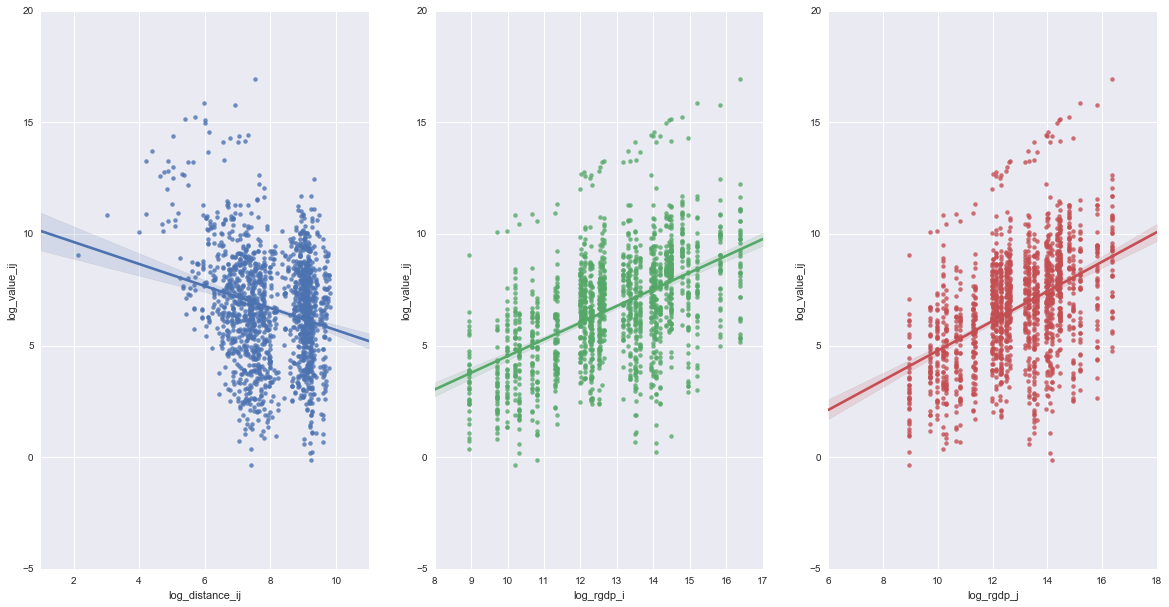

In [56]:
# scatter plots
%matplotlib inline

# set number of subplots and figure size
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# regression plots
sns.regplot(x="log_distance_ij", y="log_value_ij", data=trade_data_df, ax=axs[0])
sns.regplot(x="log_rgdp_i", y="log_value_ij", data=trade_data_df, ax=axs[1])
sns.regplot(x="log_rgdp_j", y="log_value_ij", data=trade_data_df, ax=axs[2])

In [59]:
# regress export value on each country's gdp and distance
reg_result = sm.ols(formula="log_value_ij ~ log_rgdp_i + log_rgdp_j + log_distance_ij", data=trade_data_df).fit()

In [61]:
print reg_result.params
print reg_result.summary()

Intercept         -7.444710
log_rgdp_i         1.017904
log_rgdp_j         0.932012
log_distance_ij   -1.364716
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           log_value_ij   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     2108.
Date:                Fri, 13 Jan 2017   Prob (F-statistic):               0.00
Time:                        13:57:48   Log-Likelihood:                -2450.7
No. Observations:                1600   AIC:                             4909.
Df Residuals:                    1596   BIC:                             4931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]

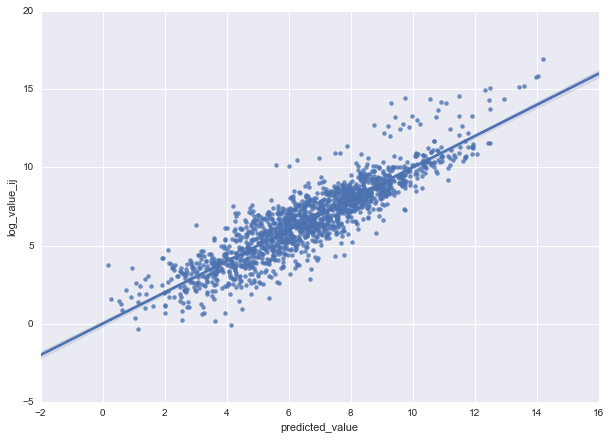

In [82]:
# get predicted values from regression and plot against actual trade values
trade_data_df['predicted_value'] = reg_result.predict()

plt.figure(figsize=(10, 7))
sns.regplot(x="predicted_value", y="log_value_ij", data=trade_data_df)

In [84]:
# run same regressions but with colonial and language dummies
reg_result_collan = sm.ols(formula="log_value_ij ~ log_rgdp_i + log_rgdp_j + log_distance_ij + colony_ij + language_ij", data=trade_data_df).fit()
print reg_result_collan.params
print reg_result_collan.summary()

Intercept         -7.690996
log_rgdp_i         0.975761
log_rgdp_j         0.889868
log_distance_ij   -1.217505
colony_ij          0.965470
language_ij        1.046559
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           log_value_ij   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1545.
Date:                Fri, 13 Jan 2017   Prob (F-statistic):               0.00
Time:                        14:24:04   Log-Likelihood:                -2319.5
No. Observations:                1600   AIC:                             4651.
Df Residuals:                    1594   BIC:                             4683.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef 